# Load Scraped Data (Seek.com)

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import json
import re

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load csv file
jobs_raw = pd.read_csv('.\jobs_raw.csv')
jobs_raw.head()

,title,state,work_type,field,salary,summary
0,Junior Market Research Data Analyst,NSW,Full Time,Marketing & Communications,"$55,000 - $64,999",About the business Small but mighty – our te...
1,Head of Data Analytics Strategy,NSW,Part Time,Consulting & Strategy,NaN,"The Actuaries Institute, a highly respected pr..."
2,Data Analyst / Database Officer,NSW,Full Time,Information & Communication Technology,NaN,A full-time position is available for a Data A...
3,Data Analyst,NSW,Full Time,Information & Communication Technology,$90k base + super + bonus,This well established company has a start-up c...
4,BI/Data Analyst,QLD,Full Time,Information & Communication Technology,Attractive Salary + Super,We are on the lookout for motivated BI/Data An...


In [4]:
jobs_raw.tail(50)

,title,state,work_type,field,salary,summary
2811,Credit Reporting Analyst,NSW,Full Time,Accounting,NaN,"The CompanyJoin a market leading, reputabe Aus..."
2812,Administration Clerk,VIC,Full Time,Administration & Office Support,NaN,Two vacancies available - x1 permanent and x1 ...
2813,Applications and Reporting Analyst,SA,Full Time,Information & Communication Technology,NaN,Finite is Australia’s leading IT ‘recruiter o...
2814,Business Planning Manager - Strategy and Analy...,NSW,Full Time,Consulting & Strategy,$190k plus super,people2people are excited to be working closel...
2815,Business Analyst,NSW,Full Time,Consulting & Strategy,Up to $800 p.d. + Super,12 Month ContractGovernment Based ClientBased ...
2816,Enterprise Architect,NSW,Full Time,Information & Communication Technology,$175k - $200k p.a.,This Public Service organisation has an immedi...
2817,Business Analyst,SA,Casual/Vacation,"Mining, Resources & Energy",NaN,The Opportunity:WorkPac Professional are looki...
2818,Administration/E-commence Assistant,VIC,Full Time,Administration & Office Support,NaN,"About the business Established in 1993, our ..."
2819,Inventory Support Administrator,VIC,Full Time,Administration & Office Support,NaN,Liaise with Warehouse and Head Office to suppo...
2820,SQL Database Administrator,QLD,Contract/Temp,Information & Communication Technology,$90 - $95 p.h. + super,Initial 6 month contract!CBD Location!$95 per ...


# Extract numerical salary from 'salary' column

In [5]:
# Remove raws where 'salary' = NaN and reset index

jobs_raw.dropna(subset=['salary'], inplace=True)
jobs_raw.reset_index(inplace=True, drop=True)

In [6]:
jobs_raw.head()

,title,state,work_type,field,salary,summary
0,Junior Market Research Data Analyst,NSW,Full Time,Marketing & Communications,"$55,000 - $64,999",About the business Small but mighty – our te...
1,Data Analyst,NSW,Full Time,Information & Communication Technology,$90k base + super + bonus,This well established company has a start-up c...
2,BI/Data Analyst,QLD,Full Time,Information & Communication Technology,Attractive Salary + Super,We are on the lookout for motivated BI/Data An...
3,Data Analyst (Data Science Team),NSW,Full Time,Information & Communication Technology,Up to 120K Base + Super + Bonus,This is a newly created role and Data Science ...
4,Data & Statistical Analyst,NSW,Full Time,Healthcare & Medical,"$110,961.00 - $126,496.00 per annum plus super",Collaboration. Innovation. Better Healthcare...


In [7]:
# Remove commas from 'salary', 'suburb' & 'department' columns just because they are annoying!

jobs_raw[['salary']] = jobs_raw[['salary']].apply(lambda x: x.str.replace(',', ''))

In [8]:
# Convert salary data type to string as it is a mixture of string and float types.

jobs_raw['salary'] = jobs_raw['salary'].apply(str)

In [9]:
# Check unique values of 'salary' column

jobs_raw['salary'].unique()

array(['$55000 - $64999', '$90k base + super + bonus',
       'Attractive Salary + Super', 'Up to 120K Base + Super + Bonus',
       '$110961.00 - $126496.00 per annum plus super ',
       '$27 - $30 p.h. + super', '$120000/$130000 plus super',
       '$55k Plus Super & Annual Bonus', '$110k - $130k p.a.',
       '$50000 - $54999', '$70-80k package', '$65 - $75 per hour',
       '$115k - $130k + super',
       'Base salary commencing $86105 p.a plus super',
       '$27 - $28 p.h. + asap start ', '$110k - $115k p.a. + super',
       'Competitive base & discounted Insurance benefits!',
       '$82801 - $112974 plus superannuation.',
       '$600 - $650 per day + super', '$120-140+ super',
       '$30.57 plus super', '$100-110k+ Super',
       '$82801 - $112974 plus superannuation',
       '$120k - $140k p.a. + super and bonus', 'Daily Rate',
       'Competitive remuneration & 13% super',
       '$60000.00 - $70000.00 p.a.', '$90k - $120k p.a.',
       '$80k - $90k p.a. + Super ', '$75000

### Create a function to extract numbers from a string
This function will return a salary or an average of salary if a range is given.

In [10]:
# Note this function is only applied after the cleaning of 'salary' column

def salary_avg(salary):
    
    # In case of only 1 numerical salary data (ie $100k, $40 per/hour, $120000) in a string
    
    if len(re.findall(r"(\d+)", salary)) == 1:
        lower = int(re.findall(r"(\d+)", salary)[0])
        upper = lower
    
    
    # In case of salary range data (ie $80-100k, $110000-$130000) in a string
    
    elif len(re.findall(r"(\d+)", salary)) >= 2:
        lower = int(re.findall(r"(\d+)", salary)[0])
        upper = int(re.findall(r"(\d+)", salary)[1])
        
    
    # In case of no numerical salary data (ie 'attractive salary', 'laptop + % super') in a string
    
    else:
        lower = np.nan
        upper = np.nan
    
    return((lower + upper)/2)

### Clean 'salary' column and apply salary_avg function

In [11]:
# Create a new column jobs_raw['salary_avg']

#jobs_raw['salary_avg'] = np.nan


#-------------------------------------------------------------------------------------------------------------
# We will look at all types of salary format under 'salary' column

for i, e in enumerate(jobs_raw['salary']):
    
    

    #---------------------------------------------------------------------------------------------------------
    # For the 'salary' cell that contains numerical data:
    
    # pre-cleaning for ease of processing
    e = e.replace('Band 6', '')
    e = e.replace('Level 3', '')
    e = e.replace('Level 6', '')
    e = e.replace('APS6 and EL1', '')
    e = e.replace('$0', '')
    e = e.replace('.00', '')
    e = e.replace('$55-60000', '$55000-60000')
    e = e.replace('$75-88000', '$75000-88000')
    e = e.replace('$120k', '120000')
    e = e.replace('$110k', '110000')
    e = e.replace('$110 - $120 p.a.', '$110k - $120k p.a.')
    
    jobs_raw.loc[i, 'salary'] = e

    
    # remove all decimal places
    
    # In case of 1 number with a decimal place
    if len(re.findall(r"([.]\d+)", e)) == 1:
        jobs_raw.loc[i, 'salary'] = e.replace(re.findall(r"([.]\d+)", e)[0], '')
        
    # In case of more than 1 number with a decimal place
    elif len(re.findall(r"([.]\d+)", e)) > 1:
        e = e.replace(re.findall(r"([.]\d+)", e)[0], '')
        #e = e.replace(re.findall(r"([.]\d+)", e)[0], '')
        
        jobs_raw.loc[i, 'salary'] = e
 

    # remove all super%
    if len(re.findall(r"(\d+[.]\d+[%]|\d+[%])", e)) == 1 or len(re.findall(r"(\d+[.]\d+[%]|\d+[%])", e)) == 2:
        jobs_raw.loc[i, 'salary'] = e.replace(re.findall(r"(\d+[.]\d+[%]|\d+[%])", e)[0], '')

    
    
    
    #------------------------------------------------------------
    # Annual salary expressed in 5-6 digits
    
    # In case of some numbers in the cell (not just some wiritngs such as 'Attractive Salary') & 
    #  the length of the first number is greater than 5 digits, put the number in the 'salary_dol' cell.

    
    if (len(re.findall(r"(\d+)", e)) > 0 and len(re.findall(r"(\d+)", e)[0]) >= 5):
        
        #print(e)
        # Correct some mistakes ($1000000-110k -> $100000-110000) & remove unwanted numbers
        e = e.replace('1000000', '100000')
        e = e.replace('$110k', '110000')
        e = e.replace('$100k', '100000')
        e = e.replace('$76570- 02091', '$76570-102091')
        e = e.replace('0421729969', '')
        
        if len(re.findall(r"(\d+)", e)) > 1 and len(re.findall(r"(\d+)", e)[1]) < 5:
            e = e.replace(re.findall(r"(\d+)", e)[1], str(int(re.findall(r"(\d+)", e)[1]) * 1000))
        
        #print(e)
        
        # average salary
        jobs_raw.loc[i, 'salary_avg'] = salary_avg(e)
    
    #------------------------------------------------------------
    # Annual salary expressed with '--k' such as 100k
    
    elif (len(re.findall(r"(\d+k|\d+K)", e)) > 0 and 'p.d.' not in e):
        
        
        # Remove unwanted numbers & change format where required
         
        e = e.replace('$118308', '118k')
        e = e.replace('180000', '180k')
        e = e.replace('$140000 - $150000', '')
        
        # In case of format '90k - 110000', we'll change it to '90k - 110k'
        if len(re.findall(r"(\d+)", e)) > 1 and len(re.findall(r"(\d+)", e)[1]) > 5:
            e = e.replace(re.findall(r"(\d+)", e)[1], str(int(re.findall(r"(\d+)", e)[1]) / 1000)+'k')
        
        # average salary
        jobs_raw.loc[i, 'salary_avg'] = (salary_avg(e)) * 1000

    #------------------------------------------------------------
    # Annual salary expressed with 'p.a.' such as 30 p.a.
    
    elif 'p.a.' in e:
        
        jobs_raw.loc[i, 'salary_avg'] = (salary_avg(e)) * 1000
        
    
    #------------------------------------------------------------
    # Monthly salary
    elif '12m' in e:
        # print(e)  9 x 12m <- assume 9,000 per month over 12 months
        
        # average salary
        jobs_raw.loc[i, 'salary_avg'] = 9000 * 12

    
    #------------------------------------------------------------
    # Weekly salary
    elif 'p.w.' in e:
        
        
        # average salary
        jobs_raw.loc[i, 'salary_avg'] = (salary_avg(e)) * 52
        
    #------------------------------------------------------------
    # Daily salary 
    elif any(ele in e for ele in ['day', 'Day', 'p/d', 'p.d.', 'pd', 'P/D', 'daily', 'Daily']):
        
        # Remove unwanted numbers & change format where required
        
        e = e.replace('1k', '1000')
        e = e.replace('$0', '')
        e = e.replace('6 months', '')

        
        # average salary
        jobs_raw.loc[i, 'salary_avg'] = (salary_avg(e)) * 5 * 52
        
        
    #------------------------------------------------------------
    # Hourly rate 
    elif any(ele in e for ele in ['p/h', 'p\\h', '/hr', 'hour', 'p.h.', 'ph', 'PH', 'per hr']):
        
        # Remove unwanted numbers
        
        e = e.replace('APS4', '')
        e = e.replace('$0', '')
        
        #print(e)
        
        # average salary
        jobs_raw.loc[i, 'salary_avg'] = (salary_avg(e)) * 7.5 * 5 * 52
    
    
    #------------------------------------------------------------
    else:

        jobs_raw.loc[i, 'salary_avg'] = jobs_raw.loc[i, 'salary_avg']

            

In [12]:
# Remove raws where 'salary_avg' = NaN

jobs_raw.dropna(subset=['salary_avg'], inplace=True)
jobs_raw.reset_index(inplace=True, drop=True)

In [13]:
# Change the sequence of columns
jobs_raw = jobs_raw[['title', 'state', 'work_type', 'field', 'salary', 'salary_avg', 'summary']]

In [14]:
# Check data frame

jobs_raw.head(20)

,title,state,work_type,field,salary,salary_avg,summary
0,Junior Market Research Data Analyst,NSW,Full Time,Marketing & Communications,$55000 - $64999,59999.5,About the business Small but mighty – our te...
1,Data Analyst,NSW,Full Time,Information & Communication Technology,$90k base + super + bonus,90000.0,This well established company has a start-up c...
2,Data Analyst (Data Science Team),NSW,Full Time,Information & Communication Technology,Up to 120K Base + Super + Bonus,120000.0,This is a newly created role and Data Science ...
3,Data & Statistical Analyst,NSW,Full Time,Healthcare & Medical,$110961 - $126496 per annum plus super,118728.5,Collaboration. Innovation. Better Healthcare...
4,Data Entry,NSW,Contract/Temp,Administration & Office Support,$27 - $30 p.h. + super,55575.0,Your New CompanyThe renowned FMCG company you ...
5,Finance Data Analyst,NSW,Contract/Temp,Accounting,$120000/$130000 plus super,125000.0,This newly formed Australian Health services p...
6,Data & Statistical Analyst,NSW,Full Time,Healthcare & Medical,$110961 - $126496 per annum plus super,118728.5,Collaboration. Innovation. Better Healthcare...
7,Data/Admin Coordinator - Immediate Start,NSW,Full Time,Administration & Office Support,$55k Plus Super & Annual Bonus,55000.0,For the past 22 years 2evolve have been redefi...
8,Commercial Insights Analyst,NSW,Full Time,Information & Communication Technology,110000 - $130k p.a.,120000.0,Working with multiple internal teams; Able to ...
9,Data Entry/Analyst,VIC,Full Time,Administration & Office Support,$50000 - $54999,52499.5,About us Direct Response Media is APACs leadi...


In [15]:
# Check if average salary makes sense (ex. lower average for data entry & higher average for specialist)

jobs_raw[jobs_raw['salary_avg'] < 40000]

,title,state,work_type,field,salary,salary_avg,summary
28,Data Entry Officer and Records Officer,WA,Contract/Temp,Administration & Office Support,Up to $30 p.a. + super,30000.0,Must have State Government Data Entry and Rec...
93,Client Reporting and Data Analyst,QLD,Part Time,Banking & Financial Services,$35000 - $40000,37500.0,About the business At Transact1 our mission i...
191,AO2 Data Entry Officer - Nambour,QLD,Contract/Temp,Administration & Office Support,Up to $30 p.a. + Super,24500.0,ABOUT HUDSONHudson is a global talent solution...
233,Admin and Showroom Support,QLD,Part Time,Administration & Office Support,$30000 - $39999,34999.5,About us We are an established business that h...
275,Customer Service/Data Entry,WA,Contract/Temp,Call Centre & Customer Service,$28 - $29 p.a.,28500.0,Are you an experience customer service operato...
346,Marketing Analyst,VIC,Full Time,Marketing & Communications,$70000 Base plus Superannuation,39500.0,About The RoleReporting to the Marketing Manag...
397,Data Entry Specialist - Order processing,NSW,Full Time,Administration & Office Support,- $30 p.a. + Super,30000.0,Our client is a global leader in the provision...
432,MSBI consultant,NSW,Contract/Temp,Information & Communication Technology,$600 - $900 p.w. + plus super,39000.0,Summary of the Team This is one of the most ex...
623,International Specialist,QLD,Part Time,Administration & Office Support,$27818 ( of $55636) + super + leave loading,38909.0,About Tourism and Events Queensland Tourism a...
672,Training Coordinator,VIC,Contract/Temp,Administration & Office Support,$35 - $38 per day,9490.0,Fantastic opportunity to work for a leading go...


In [16]:
jobs_raw[jobs_raw['salary_avg'] > 200000]

,title,state,work_type,field,salary,salary_avg,summary
32,Cloud Data Analyst Engineer (Cloudera Hadoop S...,NSW,Contract/Temp,Information & Communication Technology,$700-$850/day,201500.0,My client is urgently looking for a couple of ...
44,Project Manager - Data Transformation,NSW,Contract/Temp,Information & Communication Technology,$900-950/day inc super,240500.0,An outstanding opportunity for a Project Manag...
45,People Data Insights Manager,NSW,Contract/Temp,Information & Communication Technology,$600 - $800 p.a. + including super,700000.0,Exciting HR and data related projectsOpportuni...
97,Data Engineer - up to $780/day,NSW,Contract/Temp,Information & Communication Technology,up to $780/day,202800.0,Come and work for a leading Australian brand k...
104,Data Modeller,NSW,Contract/Temp,Insurance & Superannuation,up to $1000/day inclusive of super,260000.0,Data Modeller - ActuarialSAS and ExcelWe are c...
105,Data Engineer Azure,NSW,Full Time,Information & Communication Technology,up to 110000 + super + bonus = $130k package,55005000.0,"The company is a global, high growth group tha..."
108,Data / System Analyst Modeller,ACT,Contract/Temp,Information & Communication Technology,$110 - $130 (Inc. Super) per hour,234000.0,\n\nMultiple Data / System Analyst Modeller c...
111,Data Architect,NSW,Contract/Temp,Information & Communication Technology,Daily Rate for 6 months - $1000 - $1200 + Super,286000.0,Data Architect - Information ManagementThis ro...
120,Data Analyst - Remediation - Financial Services,NSW,Contract/Temp,Banking & Financial Services,Daily rate $750 - $850 + super,208000.0,Data Analyst - Remediation - Financial Servic...
127,Data Engineer - Up to $820/Day,NSW,Contract/Temp,Information & Communication Technology,Up to $800/Day!,208000.0,"Our client is an iconic, Australian retail gia..."


In [17]:
# Find number of average salary available
print('There are ', jobs_raw['salary_avg'].notnull().sum(), ' jobs with salary information.')

There are  705  jobs with salary information.


In [18]:
# Check the min/max/mean/median/quantile of original salary data
jobs_raw['salary_avg'].describe()

count    7.050000e+02
mean     4.353614e+05
std      4.126672e+06
min      9.490000e+03
25%      7.999950e+04
50%      1.053000e+05
75%      1.499995e+05
max      5.504500e+07
Name: salary_avg, dtype: float64

## Plot salary_avg distribution

In [19]:
# First, create a dataframe with no NaN value under average salary column

salary_df =  jobs_raw.dropna(subset=['salary_avg'])

In [20]:
salary_df.describe().T

,count,mean,std,min,25%,50%,75%,max
salary_avg,705.0,435361.399291,4.126672e+06,9490.0,79999.5,105300.0,149999.5,55045000.0


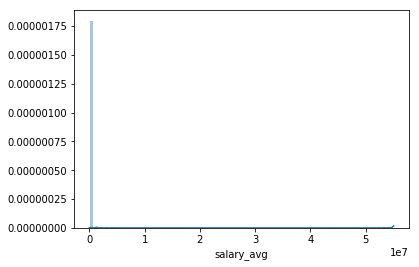

In [21]:
ax = sns.distplot(jobs_raw['salary_avg'], hist=True, bins=100)

In [22]:
# We'll remove any salary greater than $400,000

salary_UpTo400k =  jobs_raw[jobs_raw['salary_avg'] < 300000]

In [23]:
salary_UpTo400k['salary_avg'].describe()

count       692.000000
mean     117451.642341
std       53210.271009
min        9490.000000
25%       79950.000000
50%      105000.000000
75%      145074.750000
max      299000.000000
Name: salary_avg, dtype: float64

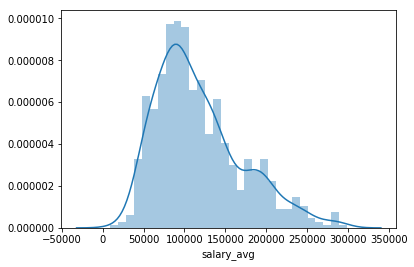

In [24]:
ax = sns.distplot(salary_UpTo400k['salary_avg'], hist=True, bins=30)

In [25]:
# We'll remove outliers

quantiles = np.percentile(salary_UpTo400k['salary_avg'], [25, 50, 75])

Q1     = quantiles[0]
median = quantiles[1]
Q3     = quantiles[2]
IQR    = Q3 - Q1

lower_outlier = Q1 - 1.5 * IQR
upper_outlier = Q3 + 1.5 * IQR

print('Quartile 1: ', Q1)
print('median    : ', median)
print('Quartile 3: ', Q3)
print('IQR       : ', IQR)
print('lower_outlier: ', lower_outlier)
print('upper_outlier: ', upper_outlier)

Quartile 1:  79950.0
median    :  105000.0
Quartile 3:  145074.75
IQR       :  65124.75
lower_outlier:  -17737.125
upper_outlier:  242761.875


In [26]:
# We'll remove any salary outside of lower and upper outliers

salary_noOutliers =  salary_UpTo400k[(salary_UpTo400k['salary_avg'] > lower_outlier) & (salary_UpTo400k['salary_avg'] < upper_outlier)]

In [27]:
salary_noOutliers.describe().T

,count,mean,std,min,25%,50%,75%,max
salary_avg,674.0,113481.04822,47877.457869,9490.0,79706.25,103183.75,140000.0,242450.0


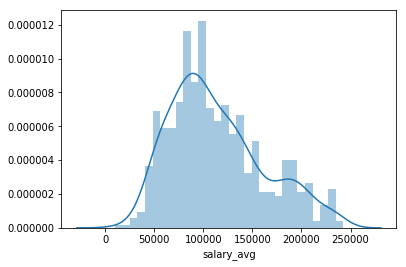

In [28]:
ax = sns.distplot(salary_noOutliers['salary_avg'], hist=True, bins=30)

In [29]:
salary_noOutliers.head(2)

,title,state,work_type,field,salary,salary_avg,summary
0,Junior Market Research Data Analyst,NSW,Full Time,Marketing & Communications,$55000 - $64999,59999.5,About the business Small but mighty – our te...
1,Data Analyst,NSW,Full Time,Information & Communication Technology,$90k base + super + bonus,90000.0,This well established company has a start-up c...


In [30]:
len(salary_noOutliers)

674

## Class salary

From above analysis, we will label salary as following.

 1: salary average is less than 1st quartile (salary < $80,000)
 2: salary average is between 1st quartile and median ($80,000 <= salary < $105,000)
 3: salary average is between median and 3rd quartile ($105,000 <= salary < $145000)
 4: salary average is greater than 3rd quartile (salary >= $145000)

In [31]:
for i, e in enumerate(jobs_raw['salary_avg']):
    if e < Q1:
        jobs_raw.loc[i, 'salary_label'] = 1
    elif e >= Q1 and e < median:
        jobs_raw.loc[i, 'salary_label'] = 2
    elif e >= median and e < Q3:
        jobs_raw.loc[i, 'salary_label'] = 3
    else:
        jobs_raw.loc[i, 'salary_label'] = 4

In [32]:
# Change sequence of column
jobs_raw = jobs_raw[['title', 'state', 'work_type', 'field', 'salary', 'salary_avg', 'salary_label', 'summary']]

In [33]:
# Check data frame
jobs_raw.head()

,title,state,work_type,field,salary,salary_avg,salary_label,summary
0,Junior Market Research Data Analyst,NSW,Full Time,Marketing & Communications,$55000 - $64999,59999.5,1.0,About the business Small but mighty – our te...
1,Data Analyst,NSW,Full Time,Information & Communication Technology,$90k base + super + bonus,90000.0,2.0,This well established company has a start-up c...
2,Data Analyst (Data Science Team),NSW,Full Time,Information & Communication Technology,Up to 120K Base + Super + Bonus,120000.0,3.0,This is a newly created role and Data Science ...
3,Data & Statistical Analyst,NSW,Full Time,Healthcare & Medical,$110961 - $126496 per annum plus super,118728.5,3.0,Collaboration. Innovation. Better Healthcare...
4,Data Entry,NSW,Contract/Temp,Administration & Office Support,$27 - $30 p.h. + super,55575.0,1.0,Your New CompanyThe renowned FMCG company you ...


# Sort title before EDA

In [34]:
for i, e in enumerate(jobs_raw['title']):
    if 'analyst' in e.lower():
        jobs_raw.loc[i, 'title_category'] = 'analyst'
    elif 'engineer' in e.lower():
        jobs_raw.loc[i, 'title_category'] = 'engineer'
    elif 'scien' in e.lower():
        jobs_raw.loc[i, 'title_category'] = 'data scientist'
    elif 'consult' in e.lower():
        jobs_raw.loc[i, 'title_category'] = 'consultant'
    elif 'entry' in e.lower() or 'admin' in e.lower():
        jobs_raw.loc[i, 'title_category'] = 'data entry'
    else:  # 'architect', 'developer', '-- officer'...
        jobs_raw.loc[i, 'title_category'] = 'others'

In [35]:
# Check data frame
jobs_raw.head(20)

,title,state,work_type,field,salary,salary_avg,salary_label,summary,title_category
0,Junior Market Research Data Analyst,NSW,Full Time,Marketing & Communications,$55000 - $64999,59999.5,1.0,About the business Small but mighty – our te...,analyst
1,Data Analyst,NSW,Full Time,Information & Communication Technology,$90k base + super + bonus,90000.0,2.0,This well established company has a start-up c...,analyst
2,Data Analyst (Data Science Team),NSW,Full Time,Information & Communication Technology,Up to 120K Base + Super + Bonus,120000.0,3.0,This is a newly created role and Data Science ...,analyst
3,Data & Statistical Analyst,NSW,Full Time,Healthcare & Medical,$110961 - $126496 per annum plus super,118728.5,3.0,Collaboration. Innovation. Better Healthcare...,analyst
4,Data Entry,NSW,Contract/Temp,Administration & Office Support,$27 - $30 p.h. + super,55575.0,1.0,Your New CompanyThe renowned FMCG company you ...,data entry
5,Finance Data Analyst,NSW,Contract/Temp,Accounting,$120000/$130000 plus super,125000.0,3.0,This newly formed Australian Health services p...,analyst
6,Data & Statistical Analyst,NSW,Full Time,Healthcare & Medical,$110961 - $126496 per annum plus super,118728.5,3.0,Collaboration. Innovation. Better Healthcare...,analyst
7,Data/Admin Coordinator - Immediate Start,NSW,Full Time,Administration & Office Support,$55k Plus Super & Annual Bonus,55000.0,1.0,For the past 22 years 2evolve have been redefi...,data entry
8,Commercial Insights Analyst,NSW,Full Time,Information & Communication Technology,110000 - $130k p.a.,120000.0,3.0,Working with multiple internal teams; Able to ...,analyst
9,Data Entry/Analyst,VIC,Full Time,Administration & Office Support,$50000 - $54999,52499.5,1.0,About us Direct Response Media is APACs leadi...,analyst


# Drop unnecessary columns & shuffle the column sequence

## 'jobs_clean' data frame 

In [36]:
jobs_clean = jobs_raw.drop(['salary', 'salary_avg'], axis=1)
jobs_clean = jobs_clean[['salary_label', 'title','title_category', 'state', 'work_type', 'field', 'summary']]

In [37]:
jobs_clean

,salary_label,title,title_category,state,work_type,field,summary
0,1.0,Junior Market Research Data Analyst,analyst,NSW,Full Time,Marketing & Communications,About the business Small but mighty – our te...
1,2.0,Data Analyst,analyst,NSW,Full Time,Information & Communication Technology,This well established company has a start-up c...
2,3.0,Data Analyst (Data Science Team),analyst,NSW,Full Time,Information & Communication Technology,This is a newly created role and Data Science ...
3,3.0,Data & Statistical Analyst,analyst,NSW,Full Time,Healthcare & Medical,Collaboration. Innovation. Better Healthcare...
4,1.0,Data Entry,data entry,NSW,Contract/Temp,Administration & Office Support,Your New CompanyThe renowned FMCG company you ...
5,3.0,Finance Data Analyst,analyst,NSW,Contract/Temp,Accounting,This newly formed Australian Health services p...
6,3.0,Data & Statistical Analyst,analyst,NSW,Full Time,Healthcare & Medical,Collaboration. Innovation. Better Healthcare...
7,1.0,Data/Admin Coordinator - Immediate Start,data entry,NSW,Full Time,Administration & Office Support,For the past 22 years 2evolve have been redefi...
8,3.0,Commercial Insights Analyst,analyst,NSW,Full Time,Information & Communication Technology,Working with multiple internal teams; Able to ...
9,1.0,Data Entry/Analyst,analyst,VIC,Full Time,Administration & Office Support,About us Direct Response Media is APACs leadi...


## EDA

### We'll check the distribution of 'salary_label', 'title_category', 'state', 'work_type', 'field'

In [38]:
# Create a function for count plot annotation

def annotate(column, axis):
    
    total = len(jobs_clean[column])

    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height() + 1
        x = p.get_x() + p.get_width()/(jobs_clean[column].nunique())
        axis.annotate(percentage, (x, y))

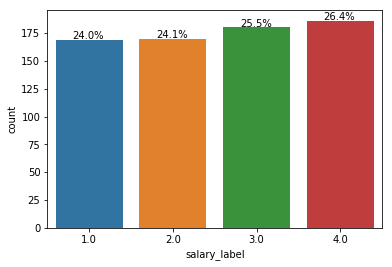

In [39]:
# 'salary_lable' count plot - We need to make sure the salary_label classes are fairly represented.

fig, ax = plt.subplots()
ax = sns.countplot(jobs_clean['salary_label'])
annotate('salary_label', ax)

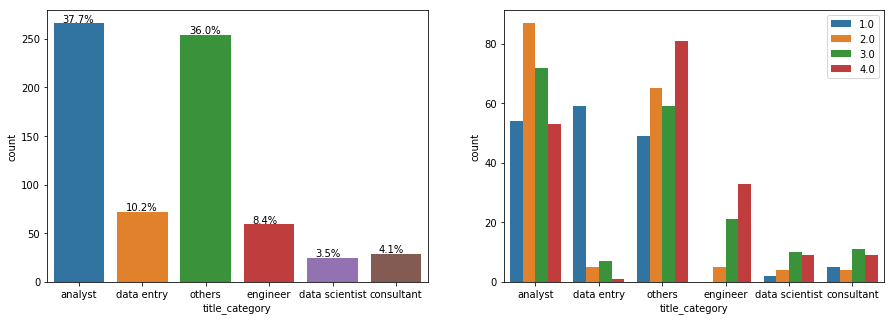

In [40]:
# 'title_category' count plot

fig, axs = plt.subplots(ncols=2, figsize=(15,5))

sns.countplot(jobs_clean['title_category'], ax=axs[0]);
annotate('title_category', axs[0])

sns.countplot(x='title_category', hue='salary_label', data=jobs_clean, ax=axs[1]);
axs[1].legend(loc='upper right')

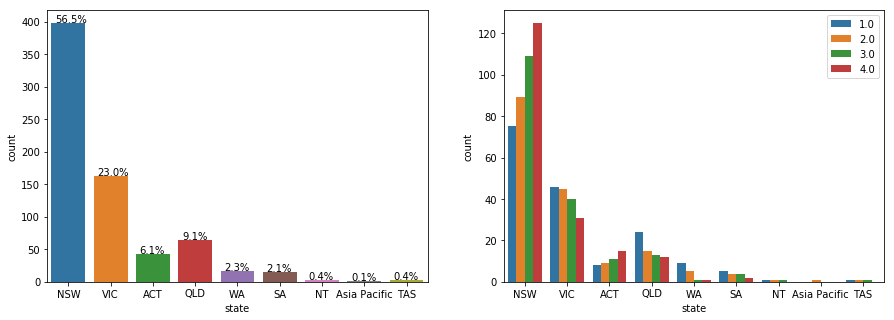

In [41]:
# 'state' count plot

fig, axs = plt.subplots(ncols=2, figsize=(15,5))

sns.countplot(jobs_clean['state'], ax=axs[0]);
annotate('state', axs[0])

sns.countplot(x='state', hue='salary_label', data=jobs_clean, ax=axs[1]);
axs[1].legend(loc='upper right')

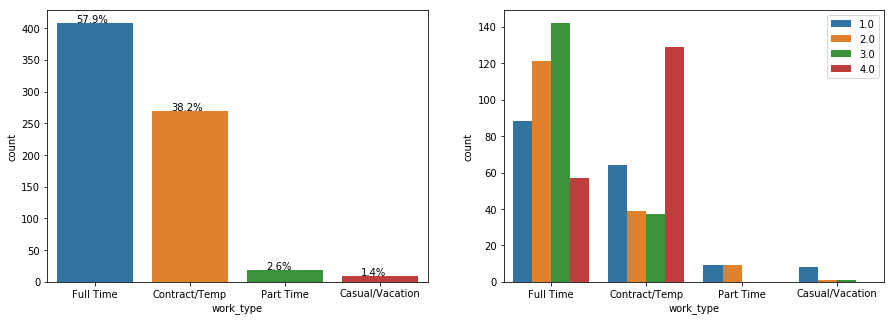

In [42]:
# 'work_type' count plot

fig, axs = plt.subplots(ncols=2, figsize=(15,5))

sns.countplot(jobs_clean['work_type'], ax=axs[0])
annotate('work_type', axs[0])

sns.countplot(x='work_type', hue='salary_label', data=jobs_clean, ax=axs[1]);
axs[1].legend(loc='upper right')

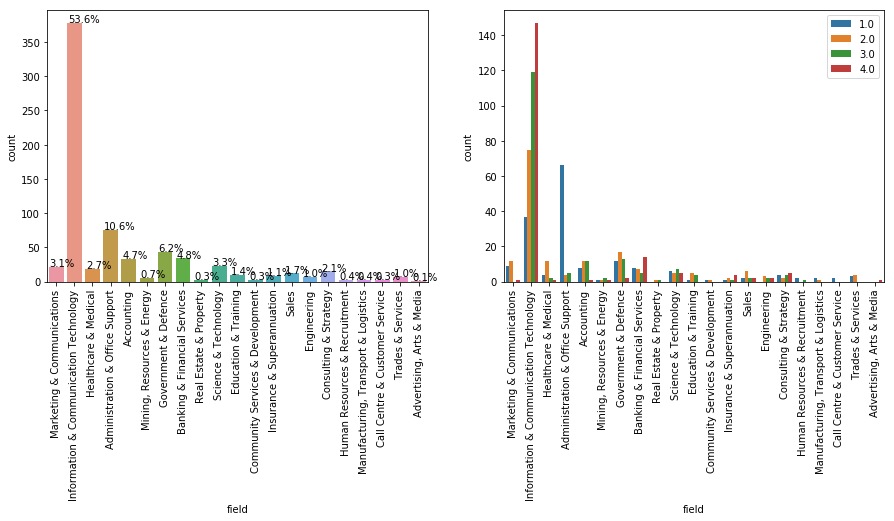

In [43]:
# 'field' count plot

fig, axs = plt.subplots(ncols=2, figsize=(15,5))

g1 = sns.countplot(jobs_clean['field'], ax=axs[0]);
g2 = sns.countplot(x='field', hue='salary_label', data=jobs_clean, ax=axs[1]);

g1.set_xticklabels(g1.get_xticklabels(), rotation=90);
g2.set_xticklabels(g1.get_xticklabels(), rotation=90);

annotate('field', axs[0])
axs[1].legend(loc='upper right')

## Combine string features_Q1

In [44]:
# We will combine 'title', 'state', 'field' and 'summary' columns prior to Natural Language Processing

for i in range(len(jobs_clean)):
    jobs_clean.loc[i, 'comb_description'] = ", ".join((jobs_clean.loc[i, 'title'], 
                                                       jobs_clean.loc[i, 'state'], 
                                                       jobs_clean.loc[i, 'work_type'],
                                                       jobs_clean.loc[i, 'field'],
                                                       jobs_clean.loc[i, 'summary']))

In [45]:
# Drop unnecessary columns from jobs_clean 

jobs_df  = jobs_clean.drop(['title', 'title_category', 'state', 'work_type', 'field', 'summary'], axis=1)

In [46]:
jobs_df.shape

(705, 2)

In [47]:
jobs_df.head()

,salary_label,comb_description
0,1.0,"Junior Market Research Data Analyst, NSW, Full..."
1,2.0,"Data Analyst, NSW, Full Time, Information & Co..."
2,3.0,"Data Analyst (Data Science Team), NSW, Full Ti..."
3,3.0,"Data & Statistical Analyst, NSW, Full Time, He..."
4,1.0,"Data Entry, NSW, Contract/Temp, Administration..."


# Pre-processing of 'summary'

Prior to countvectorising 'summary', we will apply following pre-processing:
- Tokenise 
- Remove stop words
- Lemmatise
- Stem 
- Remove_Numbers

In [48]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer

# Create stemming function

def stemming(value):  # value to be the whole sentense of summary
    
    # cleaning 
    value = value.replace(',', ' ')
    value = value.replace('.', ' ')
    value = value.replace(';', ' ')
    value = value.replace(':', ' ')
    value = value.replace('-', ' ')
    value = value.replace('?', ' ')
    value = value.replace('"\"', ' ')
    value = value.replace('/', ' ')
    value = value.replace('&', ' ')
    value = value.replace('\n', ' ')
    value = value.replace('\r', ' ')
    value = value.replace('\xa0', ' ')
    
    # covert all words to lower case
    value = value.lower()
    
    # split into a list of words
    words = value.split(' ')
    
    # remove empty strings if any
    stemmed_list = []
    stemmer = PorterStemmer()
    for word in words:
        if word != '':
            try:
                stemmed_list.append(stemmer.stem(word))
            except:
                stemmed_list.append(word)

            
    # join into a stemmed description
    stemmed_description = ' '.join(stemmed_list)
    
    return stemmed_description

In [49]:
def nlp_preprocess(value):  # value to be the whole sentense of summary
    
    # Change to lower case
    value = value.lower()
    
    # cleaning 
    value = value.replace('\n', ' ')
    value = value.replace('\r', ' ')
    value = value.replace('\xa0', ' ')
    value = re.sub('([^\w])',' ', value)

    
   # tokenize-------------------------------------------
    value = nltk.word_tokenize(value) 
    
    # remove stop words ----------------------------------
    stop_words = stopwords.words('english')
    
    for word in stop_words:
        for ele in value:
            if word == ele:
                value.remove(ele)
    
    # lemmatize--------------------------------------------
    lemmatized_word_list = []
    wordnet_lemmatizer = WordNetLemmatizer()

    for ele in value:
        lemmatized_word = wordnet_lemmatizer.lemmatize(ele)
        lemmatized_word_list.append(lemmatized_word)

    
    # Stemming --------------------------------------------
    #stemmed_word_list = []
    #snowball_stemmer = SnowballStemmer('english')
    
    #for ele in lemmatized_word_list:
    #    stemmed_word = snowball_stemmer.stem(ele)
    #    stemmed_word_list.append(stemmed_word)
    
    # Remove Numbers ---------------------------------------
    
    #for ele in stemmed_word_list:
    #    if len(re.findall(r"(\d+)", ele))==1:
    #        stemmed_word_list.remove(ele)
    
    for ele in lemmatized_word_list:
        if len(re.findall(r"(\d+)", ele))==1:
            lemmatized_word_list.remove(ele)

    # Convert list to string by .join()-----------------------------------------------
    s = " "
    s = s.join(lemmatized_word_list)
    
    return s

In [50]:
# Apply nlp_preprocess function to 'summary' column

for i, description in enumerate(jobs_df['comb_description']):
     jobs_df.loc[i, 'comb_description'] = nlp_preprocess(description)
    

In [51]:
jobs_df['comb_description'].head(5)

0    junior market research data analyst nsw full t...
1    data analyst nsw full time information communi...
2    data analyst data science team nsw full time i...
3    data statistical analyst nsw full time healthc...
4    data entry nsw contract temp administration of...
Name: comb_description, dtype: object

# Save data to csv

In [52]:
jobs_df.to_csv('./jobs_df_4_classes.csv')

## Combine string features_Q2

We will need to identify features in the data related to job postings that can distinguish job titles from each other, so we will join all features except for the job title.

In [53]:
# We will combine 'title', 'state', 'field' and 'summary' columns prior to Natural Language Processing

for i in range(len(jobs_clean)):
    jobs_clean.loc[i, 'comb_description_Q2'] = ", ".join((jobs_clean.loc[i, 'state'], 
                                                          jobs_clean.loc[i, 'work_type'],
                                                          jobs_clean.loc[i, 'field'],
                                                          jobs_clean.loc[i, 'summary']))

In [54]:
jobs_df_Q2  = jobs_clean.drop(['salary_label', 'title_category', 'state', 'work_type', 'field', 'summary'], axis=1)

In [55]:
# Apply nlp_preprocess function to 'summary' column

for i, description in enumerate(jobs_df_Q2['comb_description_Q2']):
     jobs_df_Q2.loc[i, 'comb_description_Q2'] = nlp_preprocess(description)

In [56]:
jobs_df_Q2['comb_description_Q2'].head(5)

0    nsw full time marketing communication business...
1    nsw full time information communication techno...
2    nsw full time information communication techno...
3    nsw full time healthcare medical collaboration...
4    nsw contract temp administration office suppor...
Name: comb_description_Q2, dtype: object

In [57]:
jobs_df_Q2.drop(['comb_description'], axis=1, inplace=True)

In [58]:
jobs_df_Q2.to_csv('./jobs_df_4_classes_Q2.csv')